# Logistic regression model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [3]:
df = pd.read_csv(r'data\BankChurners_preprocessed.csv')

In [4]:
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

(   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
 0  768805383               1            45       1                3   
 1  818770008               1            49       0                5   
 2  713982108               1            51       1                3   
 3  769911858               1            40       0                4   
 4  709106358               1            40       1                3   
 
    Education_Level  Income_Category  Card_Category  Months_on_book  \
 0                2                3              0              39   
 1                4                1              0              44   
 2                4                4              0              36   
 3                2                1              0              34   
 4                1                3              0              21   
 
    Total_Relationship_Count  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
 0                         5  ...                  777         

In [5]:
# Define the feature matrix X and the target vector y
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
classification_rep = classification_report(y_test, y_pred)

# Calculate FPR, TPR, and Thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nROC AUC:\n", roc_auc)



Accuracy: 0.8879565646594274

Confusion Matrix:
 Predicted    0     1   All
Actual                    
0          149   178   327
1           49  1650  1699
All        198  1828  2026

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.46      0.57       327
           1       0.90      0.97      0.94      1699

    accuracy                           0.89      2026
   macro avg       0.83      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026


ROC AUC:
 0.8990501698246676


c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Logistic regression
- Accuracy: 88.20%
- ROC AUC: 89.26% (This metric shows the capability of the model to distinguish between the classes).

###### Confusion Matrix
This table shows that out of the customers who did not churn (Actual 0), 149 were correctly classified as not churning, but 178 were incorrectly classified as churning. For the customers who did churn (Actual 1), 1650 were correctly identified, with 49 incorrectly labeled as not churning.

###### Classification report
Precision for class 0 (non-churners) is 0.75, which is decent, indicating that when the model predicts a customer won't churn, it's correct about 75% of the time.
Recall for class 0 is 0.46, suggesting the model struggles with identifying all true non-churn cases.
For class 1 (churners), precision is high at 0.90, and recall is also very high at 0.97, indicating the model is highly effective at identifying churners.

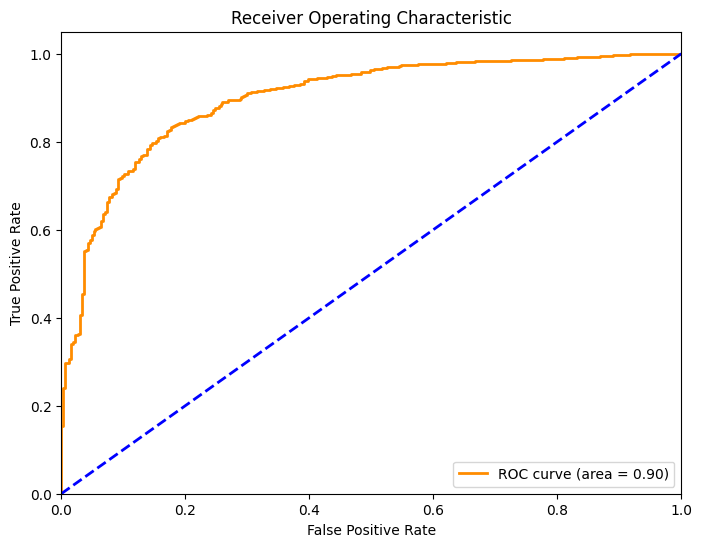

In [7]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()